# CYRILLE HOMEWORK

# **Codes Explanations**
Hi Maxime, Here is a very short explanation of my codes (everything is already detailed in the comments or in the summaries).
I start with the imports. Then I define the grid style. Then I define the DF from the link (called covid). And finally I do the exercises (code+questions answers). 

For each code, there are always two parts: 


A part where I filter the Dataset to get a clear, short, easy to read, focused and clean dataframe. Thanks to the techniques that REMI, CLEMENT and YOU taught us.


And then the other one where I simply draw the graph (cleaned = legend, title, ...) with the techniques you taught us last week.

I used mainly Matplotlib but also some Seaborn. I did 8 different types of plots.

Have a nice reading!

Ps: for the heatmap, I had to chose only 5 countries to give more sense because the dataset was to messy (only 5 value in africa!).

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime
pd.options.display.max_columns = 200
%matplotlib inline
from matplotlib.pyplot import figure as fig

In [ ]:
sns.set_style('whitegrid')

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', sep=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


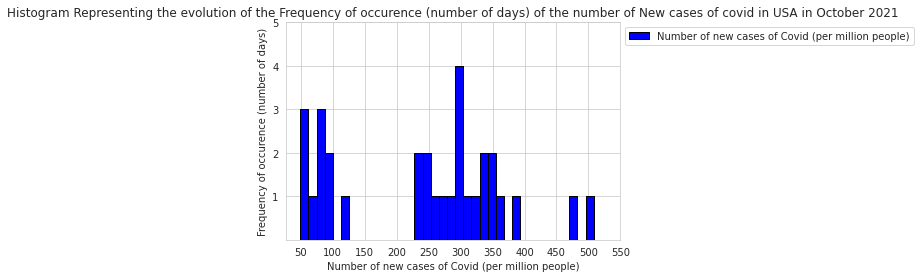

In [ ]:
# Let sketch an histogram representing the evolution of the frequency of the total number of new case (per million people) in usa (in october 2021)

# First, We have to apply some filter on our dataframe in order to have a filtred dataframe called filtred_histo

unfiltred_histo = covid[covid["iso_code"] == "USA"].loc[:, ["date", 'new_cases_per_million']]
filtred_histo = unfiltred_histo.loc[unfiltred_histo["date"].apply(lambda x: "2021-10-" in x)]

# And now our histogram

  # matplotlib histogram
plt.hist(filtred_histo['new_cases_per_million'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

  # Now let's clean our histogram
plt.title('Histogram Representing the evolution of the Frequency of occurence (number of days) of the number of New cases of covid in USA in October 2021')
plt.xlabel('Number of new cases of Covid (per million people)')
plt.ylabel('Frequency of occurence (number of days)')
plt.xticks([50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])
plt.yticks([1, 2, 3, 4, 5])
plt.legend(['Number of new cases of Covid (per million people)'], bbox_to_anchor=(1, 1.0), loc='upper left')
plt.tight_layout()

**Why a histogram ?**


*A histogram is an accurate graphical representation of the distribution of a numeric variable. It takes as input numeric variables only. The variable is cut into several bins, and the number of observation per bin is represented by the height of the bar. * 

Here, I had a numerical variable (Number of new cases of Covid (per million)) and I wanted to represent the number of observation of each value of my numerical variable (Frequency of occurence (number of days)) in this period.



**How my Histogram relevant to understand the dataset ?**

My histogram is quite interesting to understand the dataset because it allows us to understand the distribution of values and look for potential outliers by taking some continuous measurements and place them into ranges of values known as bins. 
I can also compare the situation of october 2021 qt the situation of october 2021 in order to see the evolution... and many other nice comparisons.

**From this graph we can say for instance ' in october 2021, in USA, we had around 4 days with around 300 new covid cases per million people'**


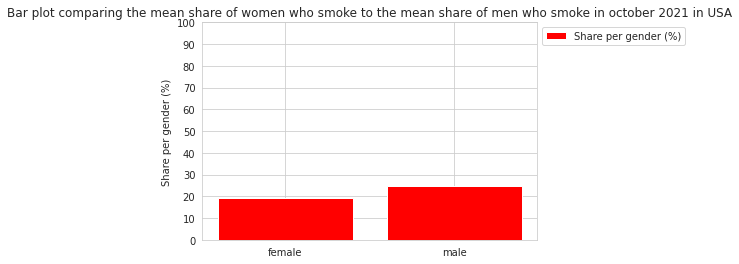

In [ ]:
# Let sketch a bar plot comparing the mean share of women who smoke to the mean share of men who smoke in october 2021 in USA

# First, We have to apply some filter on our dataframe in order to have a filtred dataframe called filtred_bar

unfiltred_bar = covid[covid["iso_code"] == "USA"].loc[:, ["date", 'female_smokers', 'male_smokers']]
filtred_bar = unfiltred_bar.loc[unfiltred_bar["date"].apply(lambda x: "2021-10-" in x)]
filtred_bar

#Now our Bar plot

  #Let's create a fake data set
share_gender_list = [filtred_bar['female_smokers'].mean(), filtred_bar['male_smokers'].mean()]
gender = ('female', 'male')
y_pos = np.arange(len(gender))

  # Create bars
plt.bar(y_pos, share_gender_list, color = 'red')

  # Create names on the x-axis
plt.xticks(y_pos, gender)

plt.title('Bar plot comparing the mean share of women who smoke to the mean share of men who smoke in october 2021 in USA')

  #Clean the graphic
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.legend(['Share per gender (%)'], bbox_to_anchor=(1, 1.0), loc='upper left')
plt.ylabel('Share per gender (%)')
  # Show graphic
plt.show()


**Why a bar plot ?**


*A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numerical and a categorical variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.*

Here, I had a numerical variable (mean share of smokers) and a categorical variable (gender). I wanted to represent each entity of my categorical variable (Female and Male) with bars. The size of each bars depended on its numerical value (share per gender %) in this period.


**How my Bar plot relevant to understand the dataset ?**

My Bar plot is quite interesting to understand the dataset for many reasons: show each data category in a frequency distribution, display relative numbers or proportions of multiple categories, summarize a large dataset in visual form, clarify trends better than do tables estimate key values at a glance, permit a visual check of the accuracy and reasonableness of calculations, be easily understood due to widespread use in business and the media.

**From this graph we can say for instance ' in october 2021, in USA, the mean share of men who smoke was higher than the mean share of women who smoke'**


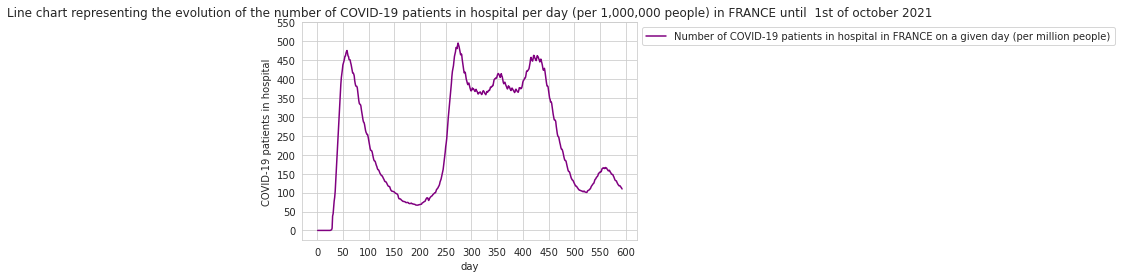

In [ ]:
# Let sketch a line chart representing the evolution of the number of COVID-19 patients in hospital on a given day per 1,000,000 people in FRANCE each day until  1st october 2021

# First, We have to apply some filter on our dataframe in order to have a filtred dataframe called filtred_line

unfiltred_line = covid[covid["location"] == "France"].loc[:, ["date", 'location', 'hosp_patients_per_million']]
not_totally_filtred_line2 = unfiltred_line.loc[unfiltred_line["date"].apply(lambda x: "2021-10-01" in x)]
  # Now, we only want to go back to our covid dataframe and get the filtred one called filtred_line
almost_filtred_line1 = covid.iloc[:int(not_totally_filtred_line2.iloc[-1:, ].index.values)+1, ]
almost_filtred_line2 = almost_filtred_line1[almost_filtred_line1["location"] == "France"].loc[:, ["date", 'location', 'hosp_patients_per_million']]
filtred_line = almost_filtred_line2[['date','location', 'hosp_patients_per_million']].dropna() #we remove the NaN in order to only get relevant values
    #Let's add a 'day' column
day = [i for i in range(1, len(filtred_line['date']) + 1)]
filtred_line['day'] = day
filtred_line
#Now our line Chart (cleaned)
filtred_line.plot(x ='day', y='hosp_patients_per_million', kind = 'line', color = 'purple')
plt.title('Line chart representing the evolution of the number of COVID-19 patients in hospital per day (per 1,000,000 people) in FRANCE until  1st of october 2021')
plt.legend(['Number of COVID-19 patients in hospital in FRANCE on a given day (per million people)'], bbox_to_anchor=(1, 1.0), loc='upper left')
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])
plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])
plt.ylabel('COVID-19 patients in hospital')
plt.xlabel('day')
plt.show()

**Why a line chart ?**


*A line chart or line graph displays the evolution of one or several numeric variables. Data points are connected by straight line segments. A line chart is often used to visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically.*
 

Here, I had a numerical variable (Number of COVID-19 patients in hospital in FRANCE on a given day (per million people). I wanted the trend of the data of my numerical variable over a an interval of time (each day from the beginning of the observatiobns to 1st October 2021).


**How my Line chart relevant to understand the dataset ?**

My Line chart is quite interesting to understand the dataset because it shows data variables and trends very clearly and can help to make predictions about the results of data not yet recorded.

**From this graph we can say for instance ' we assume that after the 1st October 2021, the number of COVID-19 patients in hospital in FRANCE on a given day (per million people) could increase again'**

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


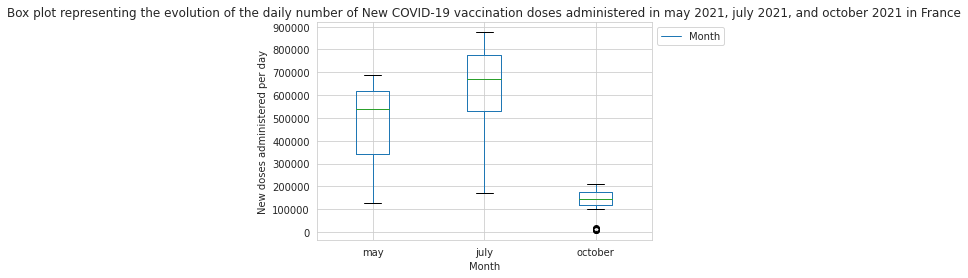

In [ ]:
# Let sketch a box plot summurazing the evolution of the 
#New COVID-19 vaccination doses administered (only calculated for consecutive days)
# in may 2021, july 2021, and october 2021 in france

# First, We have to apply some filter on our dataframe in order to have a filtred dataframe called filtred_box

unfiltred_box = covid[covid["location"] == "France"].loc[:, ["date", 'location', 'new_vaccinations']].dropna()
not_totally_filtred_box_may = unfiltred_box.loc[unfiltred_box["date"].apply(lambda x: "2021-05-" in x)]
not_totally_filtred_box_may.rename(columns = {'new_vaccinations':'may'}, inplace = True)

not_totally_filtred_box_july = unfiltred_box.loc[unfiltred_box["date"].apply(lambda x: "2021-07-" in x)]
not_totally_filtred_box_july.rename(columns = {'new_vaccinations':'july'}, inplace = True)
july = not_totally_filtred_box_july['july'].to_list()

not_totally_filtred_box_october = unfiltred_box.loc[unfiltred_box["date"].apply(lambda x: "2021-10-" in x)]
not_totally_filtred_box_october.rename(columns = {'new_vaccinations':'october'}, inplace = True)
october = not_totally_filtred_box_october['october'].to_list()

filtred_box = not_totally_filtred_box_may.reset_index().loc[:, ['may']]
filtred_box['july'] = july
filtred_box['october'] = october

# Now the cleaned Box plot
filtred_box.boxplot(column=['may', 'july', 'october'])

plt.title('Box plot representing the evolution of the daily number of New COVID-19 vaccination doses administered in may 2021, july 2021, and october 2021 in France')
plt.legend(['Month'], bbox_to_anchor=(1, 1.0), loc='upper left')
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000])
plt.ylabel('New doses administered per day')
plt.xlabel('Month')
plt.show()


**Why a box ?**


*Boxplot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers. Note that boxplot hide the number of values existing behind the variable.*
 

Here, I had several numerical variable (number of New COVID-19 vaccination doses administered in France per day at 3 different moments).


**How my Box plot relevant to understand the dataset ?**

My Box plot is quite interesting to understand the dataset for the following reasons : Summarizes variation in large datasets visually, Shows outliers, Compares multiple distributions and Indicates symmetry and skewness to a degree

**From this graph we can say for instance ' In May 2021, the median number of new doses administred per days in France was around 550000 (i.e. for 50% of the days (~15 days) at least 550 000 doses have been administred) which is lower than the median in july and greater than the median in october. With a maximum (excluding outliers) around 700 000 and a minimum around 100000.'**

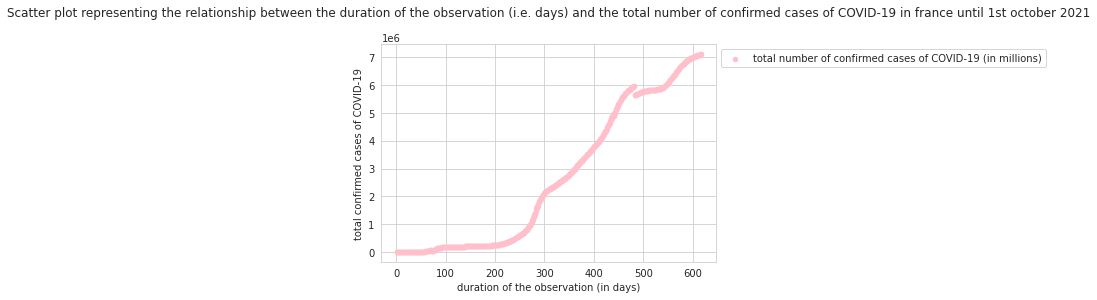

In [ ]:
# Let sketch a Scatter plot representing the relationship between the duration of the observation (i.e. days) and the total number of confirmed cases of COVID-19
# in france until 1st october 2021
# First, We have to apply some filter on our dataframe in order to have a filtred dataframe called filtred_sc

unfiltred_sc = covid[covid["location"] == "France"].loc[:, ["date", 'location', 'total_cases']]
not_totally_filtred_sc = unfiltred_sc.loc[unfiltred_sc["date"].apply(lambda x: "2021-10-01" in x)]
  # Now, we only want to go back to our covid dataframe and get the filtred one called filtred_line
almost_filtred_sc1 = covid.iloc[:int(not_totally_filtred_sc.iloc[-1:, ].index.values)+1, ]
almost_filtred_sc2 = almost_filtred_sc1[almost_filtred_sc1["location"] == "France"].loc[:, ["date", 'location', 'total_cases']]
filtred_sc = almost_filtred_sc2[['date','location', 'total_cases']].dropna() #we remove the NaN in order to only get relevant values
    #Let's add a 'duration of the observation' column
duration_of_the_observation = [i for i in range(1, len(filtred_sc['date']) + 1)]
filtred_sc['duration of the observation'] = duration_of_the_observation
filtred_sc

#Now our Scatter Plot (cleaned)
filtred_sc.plot(x ='duration of the observation', y='total_cases', kind = 'scatter', color = 'pink')
plt.title('Scatter plot representing the relationship between the duration of the observation (i.e. days) and the total number of confirmed cases of COVID-19 in france until 1st october 2021', y = 1.1)
plt.legend(['total number of confirmed cases of COVID-19 (in millions)'], bbox_to_anchor=(1, 1.0), loc='upper left')
plt.ylabel('total confirmed cases of COVID-19')
plt.xlabel('duration of the observation (in days)')
plt.show()

**Why scatter plot ?**


*A scatterplot displays the relationship between 2 numeric variables. For each data point, the value of its first variable is represented on the X axis, the second on the Y axis.*
 

Here, I had 2 numerical variables (duration and confirmed cases) and I wanted to know their relationship (e.g. association, indepenndance, ...).


**How my scatter plot relevant to understand the dataset ?**

My scatter plot is quite interesting to understand the dataset for the following reasons : shows the relationship between two variables, range of data can be determined (e.g. min and max) and patterns are easy to observe.

**From this graph we can say for instance ' The total number of covid confirmed cases inn france until 1st oct 2021 and the duration of the observation seems positively associated (i.e. the more the observation duration is long, the more the number increase)'**

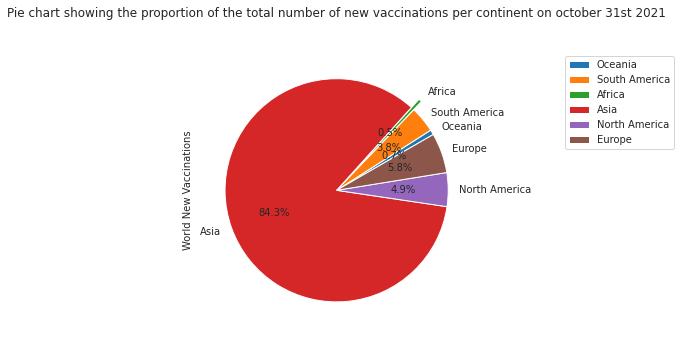

In [ ]:
# Let sketch a pie chart showing the proportion of the total number of new vaccinations per continent on october 31st 2021
#Filter PRocess
unfiltred_pie = covid[(covid["continent"] == 'Asia') | (covid["continent"] == 'Africa')  | (covid["continent"] == 'Europe') | (covid["continent"] == 'North America') | (covid["continent"] == 'South America') | (covid["continent"] == 'Oceania')].loc[:, ["date", 'continent', 'location', 'new_vaccinations']]
unfiltred_piebis = unfiltred_pie.loc[unfiltred_pie["date"].apply(lambda x: "2021-10-31" in x)]

asiadf = unfiltred_piebis[(unfiltred_piebis["continent"] == 'Asia')].dropna()
new_vaccinations_asia = asiadf['new_vaccinations'].sum()

africadf = unfiltred_piebis[(unfiltred_piebis["continent"] == 'Africa')].dropna()
new_vaccinations_africa = africadf['new_vaccinations'].sum()

europedf = unfiltred_piebis[(unfiltred_piebis["continent"] == 'Europe')].dropna()
new_vaccinations_europe = europedf['new_vaccinations'].sum()

NorthAmericadf = unfiltred_piebis[(unfiltred_piebis["continent"] == 'North America')].dropna()
new_vaccinations_NorthAmerica = NorthAmericadf['new_vaccinations'].sum()

SouthAmericadf = unfiltred_piebis[(unfiltred_piebis["continent"] == 'South America')].dropna()
new_vaccinations_SouthAmerica = SouthAmericadf['new_vaccinations'].sum()

Oceaniadf = unfiltred_piebis[(unfiltred_piebis["continent"] == 'Oceania')].dropna()
new_vaccinations_Oceania = Oceaniadf['new_vaccinations'].sum()

#Pie CHARt
explode = (0, 0, 0.1, 0, 0, 0)
data = {'World New Vaccinations': [new_vaccinations_Oceania , new_vaccinations_SouthAmerica  , new_vaccinations_africa , new_vaccinations_asia , new_vaccinations_NorthAmerica , new_vaccinations_europe]}
df = pd.DataFrame(data,columns=['World New Vaccinations'],index = ['Oceania','South America','Africa', 'Asia', 'North America', 'Europe'])

df.plot.pie(y='World New Vaccinations',figsize=(5, 90), explode=explode, autopct='%1.1f%%', startangle=30)

plt.legend(['Oceania','South America','Africa', 'Asia', 'North America', 'Europe'], bbox_to_anchor=(1.3, 1.0), loc='upper left')
plt.title('Pie chart showing the proportion of the total number of new vaccinations per continent on october 31st 2021', y=1.1)
plt.show()

**Why pie chart ?**


*A pie chart is a circle divided into sectors that each represent a proportion of the whole. It is often used to show percentage, where the sum of the sectors equals 100%.*
 

Here, my circle represented the total number of new vaccinations on the given day in the world (sum of all the continent). Each section was equal to a continent.


**How my pie chart relevant to understand the dataset ?**

My pie chart is quite interesting to understand the dataset for the following reasons : simple and easy-to-understand, represents data visually as a fractional part of a whole(which can be an effective communication tool for the even uninformed audience).

**From this graph we can say for instance '84% of the total number of new vaccinations in the world were in asia on 31st october 2021'**

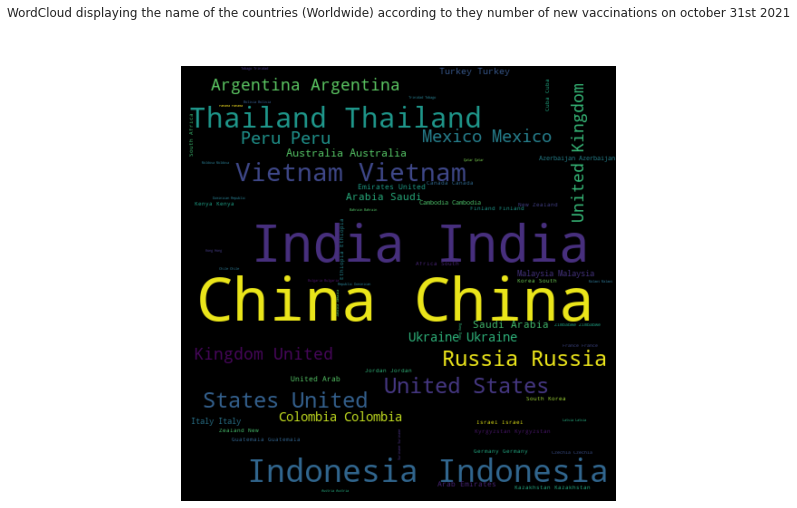

In [ ]:
# Let sketch a WordCloud displaying the name of the countries according to they number of new vaccinations on october 31st 2021
#Filt Process
from wordcloud import WordCloud
unfiltred_Cloud = unfiltred_piebis
Filtred_Cloud = unfiltred_Cloud.dropna()
new_vaccinations_floats = Filtred_Cloud['new_vaccinations'].to_list()
new_vaccinations_int = [int(value) for value in new_vaccinations_floats]
location = Filtred_Cloud['location'].to_list()
# now we want to get a list of string with each country represented n times (n = number of new vaccination in the country on the given day)
almost_countries_by_new_vaccinations = [country for country, numb_vac in zip(location, new_vaccinations_int) for _ in range(numb_vac)]
countries_by_new_vaccinations = (' '.join(almost_countries_by_new_vaccinations))

# Now the wordcloud
wordcloud = WordCloud(width=480, height=480, margin=0).generate(countries_by_new_vaccinations)
 
# Display the generated image:
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('WordCloud displaying the name of the countries (Worldwide) according to they number of new vaccinations on october 31st 2021', y = 1.1)
plt.show()

**Why WordCloud ?**


*A Wordcloud is a visual representation of text data. It displays a list of words, the importance of each being shown with font size or color.*
 
 
Here, I had a list of countries name(countries_by_new_vaccinations) with the name of each country occuring n times (n = number of new vaccination in the given country on the given day).


**How my WordCloud relevant to understand the dataset ?**

My WordCloud is quite interesting to understand the dataset for the following reasons : simple and easy-to-understand, attractive for the reader.


**From this graph we can say for instance ' China is the country in the world with the highest number of new vaccination (i.e. china have the highest frequence of occurrence in the list (countries_by_new_vaccinations)) on october 31 st 2021'**

,Africa,Europe,SouthAmerica
0,25245.0,3905.0,202282.0
1,14699.0,11.0,5202.0
2,3009.0,4971.0,2778.0
3,18641.0,7966.0,117585.0
4,8200.0,1093.0,231098.0


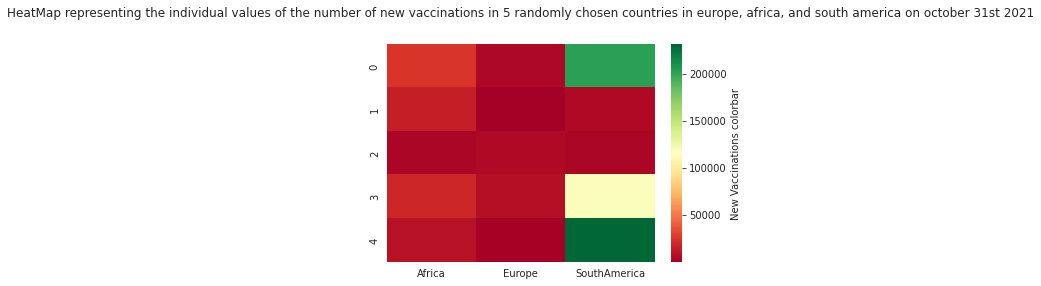

In [ ]:
# Let sketch a HeatMap representing the individual values of the number of new vaccinations in 5 randomly (not really) chosen countries
#in europe, africa, and south america on october 31st

#Filter
africadf.rename(columns = {'new_vaccinations':'Africa'}, inplace = True)


europedf.rename(columns = {'new_vaccinations':'Europe'}, inplace = True)
europe = europedf['Europe'].to_list()
europe = europe[0 : 5]


SouthAmericadf.rename(columns = {'new_vaccinations':'SouthAmerica'}, inplace = True)
SouthAmerica = SouthAmericadf['SouthAmerica'].to_list()
SouthAmerica = SouthAmerica[0 : 5]


HMdf = africadf.loc[:, ['Africa']]
HMdf['Europe'] = europe
HMdf['SouthAmerica'] = SouthAmerica

HMdf.reset_index(drop=True, inplace=True)
display(HMdf)

#Heat MAp cleaned
plt.title('HeatMap representing the individual values of the number of new vaccinations in 5 randomly chosen countries in europe, africa, and south america on october 31st 2021', y=1.1)
heatmap = sns.heatmap(HMdf, cmap="RdYlGn", cbar_kws={'label': 'New Vaccinations colorbar'})

**Why Heatmap ?**


*A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. It is a bit like looking a data table from above. It is really useful to display a general view of numerical data, not to extract specific data point.*
 
 
Here, I had a dataframe containing many numerical values and I wanted to have a general view of these values.


**How my HeatMap relevant to understand the dataset ?**

My HeatMap is quite interesting to understand the dataset for the following reasons : simple and easy-to-understand, attractive for the reader (visually +++++).

**We can say, 'From the selected countries, Africa as globally a lower total number of new vaccinations than south america **